In [1]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [40]:
import pandas as pd

df = pd.read_csv("/content/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


1. Исследовать данные (размерность, пропуски, типы данных: int, str и т.д.)

In [41]:
print(df.shape, '\n', df.dtypes, '\n', df.isnull().sum())
df = df.dropna(axis=0, how = 'any')
print('-'*50)
print(df.isnull().sum())
df.shape

(96453, 12) 
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object 
 Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
--------------------------------------------------
Formatted Date              0
Summary                     0
Precip Type                 0


(95936, 12)

2. Если ли категориальные признаки, если да то какие сколько, необходимо их преобразовать

Из анализа датафрейма видно, что категориальными (не числовыми) являются данные столбцов Formatted Date, Summary, Precip Type, Daily Summary  (4 столбца по 95936 строк)

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['Formatted Date']) 
df['Formatted Date'] = label_encoder.transform(df['Formatted Date']) 

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2159,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2160,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2161,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2162,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2163,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [47]:
label_encoder2 = preprocessing.LabelEncoder() 
label_encoder2.fit(df['Summary']) 
df['Summary'] = label_encoder2.transform(df['Summary']) 

label_encoder3 = preprocessing.LabelEncoder() 
label_encoder3.fit(df['Precip Type']) 
df['Precip Type'] = label_encoder3.transform(df['Precip Type']) 

label_encoder4 = preprocessing.LabelEncoder() 
label_encoder4.fit(df['Daily Summary']) 
df['Daily Summary'] = label_encoder4.transform(df['Daily Summary']) 

df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2159,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,2160,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,2161,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,2162,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,2163,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,93568,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170
96449,93569,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170
96450,93570,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170
96451,93571,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170


3. Реализовать линейную регрессию по своему набору данных

Предсказывать будем значения столбца Summary, столбец Formatted Date учитывать не будем, так как данные там не повторяются

In [55]:
from sklearn.linear_model import LinearRegression

In [49]:
x = df[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
        'Wind Speed (km/h)', 'Wind Bearing (degrees)',
        'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']].values
y = df['Summary'].values

In [53]:
features = pd.Series(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                      'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                      'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary'])
features

0                 Precip Type
1             Temperature (C)
2    Apparent Temperature (C)
3                    Humidity
4           Wind Speed (km/h)
5      Wind Bearing (degrees)
6             Visibility (km)
7                  Loud Cover
8        Pressure (millibars)
9               Daily Summary
dtype: object

In [72]:
# Создадим модель линейной регрессии
model = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
model.fit(x, y)

# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,-7.455691e-01,Precip Type
1,1.578939e-01,Temperature (C)
2,-1.223801e-01,Apparent Temperature (C)
3,-4.694696e-01,Humidity
4,-1.538336e-02,Wind Speed (km/h)
5,6.728024e-04,Wind Bearing (degrees)
6,4.538726e-02,Visibility (km)
7,5.551115e-17,Loud Cover
8,5.145221e-03,Pressure (millibars)
9,6.591575e-03,Daily Summary


In [73]:
model.intercept_

9.441279816585919

In [74]:

y_pred = pd.DataFrame(model.predict(x), columns=['y_pred'])
y_pred['y'] = df['Summary']
y_pred

,y_pred,y
0,16.806391,19.0
1,16.827497,19.0
2,16.637941,17.0
3,16.843433,19.0
4,16.831502,17.0
...,...,...
95931,17.085465,17.0
95932,16.996829,17.0
95933,16.920143,17.0
95934,16.854003,17.0


In [83]:
# Сделаем все тоже самое, но только возьмем один признак для построениея модели

# выделим вектор признака и вектор ответов
X = df[['Daily Summary']].values
Y = df['Summary'].values

# создадим модель линейной регрессии
slr = LinearRegression()

slr.fit(X, Y)

Y_pred = slr.predict(X)

print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [0.0121349]
Intercept: 14.443304693400373


4. Визуализировать данные до линейной регрессии

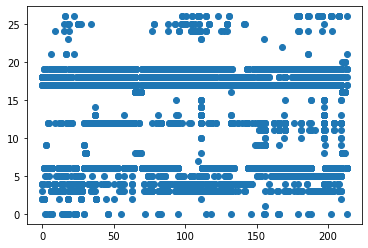

In [84]:
plt.scatter(X, Y)

5. Визуализировать график с данными и с линейным графиков регрессии

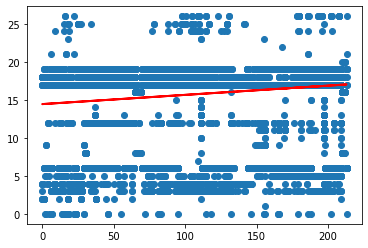

In [85]:
plt.scatter(X, Y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)

6. Оценить вашу модель с помощью метрик регрессии (MSE)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(Y, Y_pred)))

MSE: 18.507


7. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему

Вывод: наверное, оценка неплохая. 
Y_pred = 14.44 -7.455691*X1 + 1.578939*X2 -1.223801*X3 -4.694696*X4 -1.538336*X5 + 6.728024*X6 + 4.538726*X7	+	5.551115*X8 + 5.145221*X9 + 6.591575*X10

Наиболее значимые признаки - Precip Type, Wind Bearing (degrees), Daily Summary (у них наибольшие по модулю весы)
Наименее значимые - Apparent Temperature (C), Wind Speed (km/h), Temperature (C) (наименьшие весы по модулю)